# ЛАБОРАТОРНАЯ РАБОТА №2

# Выполнили: Рогозян Анастасия и Дробот Елизавета

Сначала мы загружаем нужные нам библиотека для работы с сайтом YahooFinancials. Подключаем библиотеки через import.

In [1]:
pip install YahooFinancials

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ruamel-yaml

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
from yahoofinancials import YahooFinancials
import datetime
import matplotlib.pyplot as plt
import copy
import math
import scipy
import scipy.stats
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,31)
import seaborn as sns
import warnings
from random import randint
from scipy.optimize import minimize
from matplotlib.ticker import ScalarFormatter
warnings.filterwarnings('ignore')

from IPython.display import clear_output

Загружаем файл, в который заранее скачали информацию обо всех акциях биржи Индийского фонда.

In [6]:
companies = pd.read_csv("resalt.csv")
companies

,Название,Тикер,Биржа,Cектор,Изм.%
0,3P Land,3PLA,NSE,Недвижимость,"-0,88"
1,3rd Rock Multimedia Ltd,3RDR,NSE,Услуги связи,0
2,63 Moons Tech,63MO,NSE,Информационные технологии,"4,14"
3,A2z Infra Engineering,A2ZI,NSE,Промышленность,"-3,96"
4,AAA Technologies,AAAH,NSE,Информационные технологии,"1,47"
...,...,...,...,...,...
2061,Zota Health Care,ZOTA,NSE,Здравоохранение,"-1,75"
2062,Zuari Agro Chemicals Ltd,ZUAR,NSE,Материалы,"2,03"
2063,Zuari Industries,ZURI,NSE,Производители товаров массового потребления,"0,3"
2064,Zydus Wellness,ZYDS,NSE,Производители товаров массового потребления,"-0,96"


Из файла выше нам понадобятся тикеры компаний.

In [7]:
Symbols = companies['Тикер'].tolist()
Symbols.sort()
Symbols

['3PLA',
 '3RDR',
 '63MO',
 'A2ZI',
 'AAAH',
 'AAAI',
 'AADM',
 'AAKA',
 'AARI',
 'AARN',
 'AARU',
 'ABAN',
 'ABB',
 'ABCO',
 'ABDL',
 'ABHE',
 'ABIN',
 'ABML',
 'ABMN',
 'ABMT',
 'ABOT',
 'ABUJ',
 'ACC',
 'ACCO',
 'ACCU',
 'ACCY',
 'ACEL',
 'ACEN',
 'ACLL',
 'ACPL',
 'ACRI',
 'ADAG',
 'ADAI',
 'ADAN',
 'ADAW',
 'ADEL',
 'ADEN',
 'ADHO',
 'ADIA',
 'ADIE',
 'ADIS',
 'ADNA',
 'ADOR',
 'ADPH',
 'ADRG',
 'ADTB',
 'AEGS',
 'AETH',
 'AFFL',
 'AGIG',
 'AGRO',
 'AGRP',
 'AGST',
 'AGTL',
 'AGWL',
 'AHFN',
 'AHIN',
 'AHLA',
 'AHLU',
 'AIAE',
 'AIRA',
 'AIRO',
 'AISG',
 'AJAN',
 'AJME',
 'AJOO',
 'AJPH',
 'AJRI',
 'AKAS',
 'AKGE',
 'AKSH',
 'AKSO',
 'AKZO',
 'ALAK',
 'ALBD',
 'ALCL',
 'ALEM',
 'ALIO',
 'ALKE',
 'ALKY',
 'ALLS',
 'ALMC',
 'ALML',
 'ALOK',
 'ALPA',
 'ALPI',
 'ALPS',
 'ALSL',
 'AMAR',
 'AMBE',
 'AMBK',
 'AMBN',
 'AMDM',
 'AMIO',
 'AMJL',
 'AMJU',
 'AMPL',
 'AMRN',
 'AMSP',
 'ANAA',
 'ANCM',
 'ANDA',
 'ANDC',
 'ANDS',
 'ANDY',
 'ANGO',
 'ANII',
 'ANIK',
 'ANMI',
 'ANRA',
 'ANSL',
 'A

In [8]:
# Создаем пустой DataFrame
stock_final = pd.DataFrame()
# перебираем каждый символ
for i in Symbols:  
    
    # печатаем символ, который загружается
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # скачиваем ценеу акции
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # добавляем цены отдельных акций
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None


0 : 3PLA,
1 Failed download:
- 3PLA: No data found for this date range, symbol may be delisted
1 : 3RDR,
1 Failed download:
- 3RDR: No data found for this date range, symbol may be delisted
2 : 63MO,
1 Failed download:
- 63MO: No data found for this date range, symbol may be delisted
3 : A2ZI,
1 Failed download:
- A2ZI: No data found for this date range, symbol may be delisted
4 : AAAH,
1 Failed download:
- AAAH: No data found for this date range, symbol may be delisted
5 : AAAI,
1 Failed download:
- AAAI: No data found for this date range, symbol may be delisted
6 : AADM,
1 Failed download:
- AADM: No data found for this date range, symbol may be delisted
7 : AAKA,
1 Failed download:
- AAKA: No data found for this date range, symbol may be delisted
8 : AARI,
1 Failed download:
- AARI: No data found for this date range, symbol may be delisted
9 : AARN,
1 Failed download:
- AARN: No data found for this date range, symbol may be delisted
10 : AARU,
1 Failed download:
- AARU: No data foun

99 : ANAA,
1 Failed download:
- ANAA: No data found for this date range, symbol may be delisted
100 : ANCM,
1 Failed download:
- ANCM: No data found for this date range, symbol may be delisted
101 : ANDA,
1 Failed download:
- ANDA: No data found for this date range, symbol may be delisted
102 : ANDC,
1 Failed download:
- ANDC: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
103 : ANDS,
1 Failed download:
- ANDS: No data found for this date range, symbol may be delisted
104 : ANDY,
1 Failed download:
- ANDY: No data found for this date range, symbol may be delisted
105 : ANGO,106 : ANII,
1 Failed download:
- ANII: No data found for this date range, symbol may be delisted
107 : ANIK,108 : ANMI,
1 Failed download:
- ANMI: No data found for this date range, symbol may be delisted
109 : ANRA,
1 Failed download:
- ANRA: No data found for this date range, symbol may be delisted
110 : ANSL,
1 Failed download:
- ANSL: No data found for this date range, symbol may be delisted

Exception in thread Thread-283:
Traceback (most recent call last):
  File "D:\programm\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\programm\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\programm\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\programm\lib\site-packages\yfinance\multi.py", line 191, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "D:\programm\lib\site-packages\yfinance\multi.py", line 205, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "D:\programm\lib\site-packages\yfinance\base.py", line 168, in history
    end = utils._parse_user_dt(end, tz)
  File "D:\programm\lib\site-packages\yfinance\utils.py", line 154, in _parse_user_dt
    dt = _tz.timezone(exchange_tz).localize(dt)
  File "D:\programm\lib\site-packages\pytz\__init_

KeyboardInterrupt: 

In [9]:
del Symbols[0:271]

In [10]:
# перебираем каждый символ
for i in Symbols:  
    
    # печатаем символ, который загружается
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # скачиваем ценеу акции
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # добавляем цены отдельных акций
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : BLSN,
1 Failed download:
- BLSN: No data found for this date range, symbol may be delisted
1 : BLTE,
1 Failed download:
- BLTE: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
2 : BLUS,
1 Failed download:
- BLUS: No data found for this date range, symbol may be delisted
3 : BMBK,
1 Failed download:
- BMBK: No data found for this date range, symbol may be delisted
4 : BMIL,
1 Failed download:
- BMIL: No data found for this date range, symbol may be delisted
5 : BNCO,
1 Failed download:
- BNCO: No data found for this date range, symbol may be delisted
6 : BOB,
1 Failed download:
- BOB: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
7 : BOBA,
1 Failed download:
- BOBA: No data found for this date range, symbol may be delisted
8 : BODA,
1 Failed download:
- BODA: No data found for this date range, symbol may be delisted
9 : BODI,
1 Failed download:
- BODI: No data found for this date range, symbol may be delisted
10 : BOHA,
1 Failed download:
- 

91 : CNBK,
1 Failed download:
- CNBK: No data found for this date range, symbol may be delisted
92 : CNFH,
1 Failed download:
- CNFH: No data found for this date range, symbol may be delisted
93 : CNTE,
1 Failed download:
- CNTE: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
94 : CNTP,
1 Failed download:
- CNTP: No data found for this date range, symbol may be delisted
95 : CNTX,
1 Failed download:
- CNTX: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
96 : CNTY,97 : COAL,
1 Failed download:
- COAL: No data found for this date range, symbol may be delisted
98 : COAS,
1 Failed download:
- COAS: No data found for this date range, symbol may be delisted
99 : COCH,
1 Failed download:
- COCH: No data found for this date range, symbol may be delisted
100 : COCO,
1 Failed download:
- COCO: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
101 : CODE,
1 Failed download:
- CODE: Data doesn't exist for startDate = 1483246800, endDate =

182 : DIVI,183 : DIXO,
1 Failed download:
- DIXO: No data found for this date range, symbol may be delisted
184 : DKEN,
1 Failed download:
- DKEN: No data found for this date range, symbol may be delisted
185 : DLF,
1 Failed download:
- DLF: No data found for this date range, symbol may be delisted
186 : DLIL,
1 Failed download:
- DLIL: No data found for this date range, symbol may be delisted
187 : DLLA,
1 Failed download:
- DLLA: No data found for this date range, symbol may be delisted
188 : DLMI,189 : DLPA,
1 Failed download:
- DLPA: No data found for this date range, symbol may be delisted
190 : DLTA,191 : DNBK,
1 Failed download:
- DNBK: No data found for this date range, symbol may be delisted
192 : DODL,
1 Failed download:
- DODL: No data found for this date range, symbol may be delisted
193 : DOLA,
1 Failed download:
- DOLA: No data found for this date range, symbol may be delisted
194 : DOLP,
1 Failed download:
- DOLP: No data found for this date range, symbol may be delisted

Exception in thread Thread-534:
Traceback (most recent call last):
  File "D:\programm\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\programm\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\programm\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\programm\lib\site-packages\yfinance\multi.py", line 191, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "D:\programm\lib\site-packages\yfinance\multi.py", line 205, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "D:\programm\lib\site-packages\yfinance\base.py", line 168, in history
    end = utils._parse_user_dt(end, tz)
  File "D:\programm\lib\site-packages\yfinance\utils.py", line 154, in _parse_user_dt
    dt = _tz.timezone(exchange_tz).localize(dt)
  File "D:\programm\lib\site-packages\pytz\__init_

KeyboardInterrupt: 

In [11]:
index = yf.download('^NSEI',start=start, end=end, progress=False)

## 1. Efficient frontier. Выбрать на рынке набор из 50 акций.  Объясните ваш выбор. 
Построить эффективный фронт портфелей инвестиций без ограничений на короткие позиции и  эффективный фронт с запретом коротких позиций. Сравнить эффективные фронты и сделать выводы.  При построении эффективных фронтов вычислить портфели с минимальным риском и отметить их на соответствующем эффективном фронте. Рассмотреть портфель  с равными долями вложения капитала и оценить, как  далек этот портфель от эффективного фронта. Тот же вопрос для индекса рынка.

In [12]:
stock_final.to_csv('data.csv')
index.to_csv('index.csv')

t_len = len(Symbols) - 1
d_len = len(set(stock_final['Name']))
print(f'Всего найдено акций {t_len} из них скачано {d_len}')

Всего найдено акций 1794 из них скачано 51


### Из-за скудного выбора акций из тех, что нам удалось скачать, мы решили взять именно их для дальнейшего исследования

In [13]:
data = pd.read_csv('data.csv')
index = pd.read_csv('index.csv')

data = data.drop(columns = ['Low', 'High', 'Open', 'Close'])
index = index.drop(columns = ['Low', 'High', 'Open', 'Close'])

In [14]:
adj_close = pd.DataFrame() # скорректированная цена закрытия
adj_close = data.drop(columns = ['Volume'])
adj_close = (adj_close.assign(idx=adj_close.groupby('Name').cumcount())
                 .pivot_table(index='Date', columns='Name', 
                              values='Adj Close', aggfunc='sum'))
adj_close.reset_index(level=0, inplace=True)

adj_close = adj_close.dropna(axis=1, how='any') # удаляем пропущенные значения

adj_close['NSEI'] = index['Adj Close'] # добавляем данные индекса

adj_close

Name,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
0,2017-01-03 00:00:00-05:00,17.302446,0.190,0.15,11.334505,0.003,0.00010,10.601215,0.75,10.160050,...,14000.0,31.559999,0.0300,21.192019,12.77,17.707626,0.500,0.38,0.00060,8179.500000
1,2017-01-04 00:00:00-05:00,17.375626,0.190,0.15,11.592108,0.003,0.00010,10.572171,0.75,10.160050,...,14000.0,31.949301,0.0200,21.502491,12.85,17.715078,0.500,0.38,0.00060,8192.250000
2,2017-01-05 00:00:00-05:00,17.530109,0.190,0.15,11.420372,0.003,0.00010,10.446312,0.83,9.832307,...,14450.0,32.299999,0.0200,21.685595,12.81,17.782127,0.500,0.38,0.00060,8190.500000
3,2017-01-06 00:00:00-05:00,17.562634,0.200,0.15,11.291570,0.003,0.00010,10.262364,0.83,9.832307,...,14450.0,32.249901,0.0200,21.773167,12.63,17.804472,0.500,0.38,0.00060,8273.799805
4,2017-01-09 00:00:00-05:00,17.481325,0.235,0.15,10.948101,0.003,0.00010,10.272045,0.83,9.832307,...,15150.0,32.250000,0.0200,21.717434,12.31,17.841722,0.500,0.38,0.00070,8243.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,22.367104,0.104,0.13,10.819301,0.006,0.00001,9.865423,13.00,9.527719,...,14000.0,35.169998,0.0002,23.407274,13.45,19.952734,0.345,0.48,0.00074,10477.900391
247,2017-12-26 00:00:00-05:00,22.417555,0.103,0.13,10.948101,0.006,0.00001,10.000964,13.00,9.527719,...,14000.0,35.189999,0.0012,23.736139,13.43,19.929184,0.345,0.49,0.00074,10530.700195
248,2017-12-27 00:00:00-05:00,22.484823,0.100,0.15,10.948101,0.006,0.00001,9.952557,15.00,9.653633,...,14000.0,35.360001,0.0012,23.859468,13.40,19.896221,0.345,0.56,0.00089,NaN
249,2017-12-28 00:00:00-05:00,22.543686,0.085,0.15,10.948101,0.005,0.00001,10.049372,20.00,9.653633,...,14000.0,35.078800,0.0012,23.867687,13.33,19.905638,0.345,0.52,0.00070,NaN


In [15]:
tickers = list(adj_close.columns)[1:] # создаем лист с тикерами
tickers

['ABB',
 'ABML',
 'ABMT',
 'ACCO',
 'ADIA',
 'AFFL',
 'AGRO',
 'ALMC',
 'AMBK',
 'AMJL',
 'AMRN',
 'ANGO',
 'ANIK',
 'APLO',
 'APTS',
 'ARCO',
 'ASAL',
 'ASPN',
 'ASTE',
 'ASTO',
 'AVNT',
 'AVRI',
 'BCPC',
 'BFIN',
 'BIOF',
 'CAPL',
 'CCLP',
 'CENT',
 'CMI',
 'CNTY',
 'CORI',
 'CRDE',
 'CROP',
 'CTBK',
 'CUBE',
 'DENN',
 'DIVI',
 'DLMI',
 'ELST',
 'EMBA',
 'NSEI']

### Вычислим логарифмическую доходность и делаем небольшую предобработку данных

In [16]:
log_returns50 = pd.DataFrame()
log_returns50['Date'] = adj_close['Date']

days = len(log_returns50['Date'])
for ticker in tickers:
    for i in range(1, days):
        log_returns50.loc[i, ticker] = np.log(adj_close.loc[i, ticker]/adj_close.loc[i-1, ticker])

log_returns50 = log_returns50.drop([0])

log_returns50

,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
1,2017-01-04 00:00:00-05:00,0.004220,0.000000,0.000000,0.022473,0.000000,0.0,-0.002743,0.000000,0.000000,...,0.000000,0.012260,-0.405465,0.014544,0.006245,0.000421,0.0,0.000000,0.000000,0.001558
2,2017-01-05 00:00:00-05:00,0.008852,0.000000,0.000000,-0.014926,0.000000,0.0,-0.011976,0.101352,-0.032790,...,0.031637,0.010917,0.000000,0.008479,-0.003118,0.003778,0.0,0.000000,0.000000,-0.000214
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,0.000000,-0.011342,0.000000,0.0,-0.017766,0.000000,0.000000,...,0.000000,-0.001552,0.000000,0.004030,-0.014151,0.001256,0.0,0.000000,0.000000,0.010119
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,0.000000,-0.030890,0.000000,0.0,0.000943,0.000000,0.000000,...,0.047306,0.000003,0.000000,-0.002563,-0.025663,0.002090,0.0,0.000000,0.154151,-0.003632
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.000000,0.019418,0.000000,0.0,0.012178,-0.024391,0.000000,...,0.000000,-0.006845,0.000000,-0.007728,0.009701,-0.001253,0.0,0.000000,-0.154151,-0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.000000,0.000000,0.000000,0.0,0.002948,0.000000,0.030414,...,0.000000,0.001964,0.000000,0.004577,-0.006669,0.004732,0.0,0.000000,0.000000,-0.001226
247,2017-12-26 00:00:00-05:00,0.002253,-0.009662,0.000000,0.011834,0.000000,0.0,0.013645,0.000000,0.000000,...,0.000000,0.000569,1.791760,0.013952,-0.001488,-0.001181,0.0,0.020619,0.000000,0.005027
248,2017-12-27 00:00:00-05:00,0.002996,-0.029559,0.143101,0.000000,0.000000,0.0,-0.004852,0.143101,0.013129,...,0.000000,0.004819,0.000000,0.005182,-0.002236,-0.001655,0.0,0.133531,0.184571,NaN
249,2017-12-28 00:00:00-05:00,0.002614,-0.162519,0.000000,0.000000,-0.182322,0.0,0.009681,0.287682,0.000000,...,0.000000,-0.007984,0.000000,0.000344,-0.005238,0.000473,0.0,-0.074108,-0.240141,NaN


In [17]:
log_returns50 = log_returns50.dropna()
log_returns50

,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
1,2017-01-04 00:00:00-05:00,0.004220,0.000000,0.0,0.022473,0.000000,0.0,-0.002743,0.000000,0.000000,...,0.000000,0.012260,-0.405465,0.014544,0.006245,0.000421,0.0,0.000000,0.000000,0.001558
2,2017-01-05 00:00:00-05:00,0.008852,0.000000,0.0,-0.014926,0.000000,0.0,-0.011976,0.101352,-0.032790,...,0.031637,0.010917,0.000000,0.008479,-0.003118,0.003778,0.0,0.000000,0.000000,-0.000214
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,0.0,-0.011342,0.000000,0.0,-0.017766,0.000000,0.000000,...,0.000000,-0.001552,0.000000,0.004030,-0.014151,0.001256,0.0,0.000000,0.000000,0.010119
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,0.0,-0.030890,0.000000,0.0,0.000943,0.000000,0.000000,...,0.047306,0.000003,0.000000,-0.002563,-0.025663,0.002090,0.0,0.000000,0.154151,-0.003632
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.0,0.019418,0.000000,0.0,0.012178,-0.024391,0.000000,...,0.000000,-0.006845,0.000000,-0.007728,0.009701,-0.001253,0.0,0.000000,-0.154151,-0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2017-12-19 00:00:00-05:00,0.006035,-0.009133,0.0,-0.015811,0.000000,0.0,-0.002940,0.000000,-0.017125,...,0.000000,-0.009917,0.000000,-0.024929,0.016285,-0.001577,0.0,0.000000,0.000000,0.005035
244,2017-12-20 00:00:00-05:00,-0.001129,-0.027909,0.0,0.007937,0.182322,0.0,0.008793,0.000000,0.000909,...,0.000000,-0.004423,0.000000,-0.012526,-0.002205,-0.002570,0.0,0.000000,0.209720,0.003662
245,2017-12-21 00:00:00-05:00,0.001881,-0.048319,0.0,-0.003960,0.000000,0.0,-0.011742,0.070092,0.000000,...,0.000000,0.003882,0.000000,-0.007733,-0.003686,0.001622,0.0,0.064539,0.000000,-0.003877
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.0,0.000000,0.000000,0.0,0.002948,0.000000,0.030414,...,0.000000,0.001964,0.000000,0.004577,-0.006669,0.004732,0.0,0.000000,0.000000,-0.001226


In [18]:
index_log_returns=log_returns50[['Date','NSEI']]
index_log_returns

,Date,NSEI
1,2017-01-04 00:00:00-05:00,0.001558
2,2017-01-05 00:00:00-05:00,-0.000214
3,2017-01-06 00:00:00-05:00,0.010119
4,2017-01-09 00:00:00-05:00,-0.003632
5,2017-01-10 00:00:00-05:00,-0.000941
...,...,...
243,2017-12-19 00:00:00-05:00,0.005035
244,2017-12-20 00:00:00-05:00,0.003662
245,2017-12-21 00:00:00-05:00,-0.003877
246,2017-12-22 00:00:00-05:00,-0.001226


In [19]:
log_returns50

,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
1,2017-01-04 00:00:00-05:00,0.004220,0.000000,0.0,0.022473,0.000000,0.0,-0.002743,0.000000,0.000000,...,0.000000,0.012260,-0.405465,0.014544,0.006245,0.000421,0.0,0.000000,0.000000,0.001558
2,2017-01-05 00:00:00-05:00,0.008852,0.000000,0.0,-0.014926,0.000000,0.0,-0.011976,0.101352,-0.032790,...,0.031637,0.010917,0.000000,0.008479,-0.003118,0.003778,0.0,0.000000,0.000000,-0.000214
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,0.0,-0.011342,0.000000,0.0,-0.017766,0.000000,0.000000,...,0.000000,-0.001552,0.000000,0.004030,-0.014151,0.001256,0.0,0.000000,0.000000,0.010119
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,0.0,-0.030890,0.000000,0.0,0.000943,0.000000,0.000000,...,0.047306,0.000003,0.000000,-0.002563,-0.025663,0.002090,0.0,0.000000,0.154151,-0.003632
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.0,0.019418,0.000000,0.0,0.012178,-0.024391,0.000000,...,0.000000,-0.006845,0.000000,-0.007728,0.009701,-0.001253,0.0,0.000000,-0.154151,-0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2017-12-19 00:00:00-05:00,0.006035,-0.009133,0.0,-0.015811,0.000000,0.0,-0.002940,0.000000,-0.017125,...,0.000000,-0.009917,0.000000,-0.024929,0.016285,-0.001577,0.0,0.000000,0.000000,0.005035
244,2017-12-20 00:00:00-05:00,-0.001129,-0.027909,0.0,0.007937,0.182322,0.0,0.008793,0.000000,0.000909,...,0.000000,-0.004423,0.000000,-0.012526,-0.002205,-0.002570,0.0,0.000000,0.209720,0.003662
245,2017-12-21 00:00:00-05:00,0.001881,-0.048319,0.0,-0.003960,0.000000,0.0,-0.011742,0.070092,0.000000,...,0.000000,0.003882,0.000000,-0.007733,-0.003686,0.001622,0.0,0.064539,0.000000,-0.003877
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.0,0.000000,0.000000,0.0,0.002948,0.000000,0.030414,...,0.000000,0.001964,0.000000,0.004577,-0.006669,0.004732,0.0,0.000000,0.000000,-0.001226


In [20]:
log_returns50 = log_returns50.drop(columns = ['NSEI'])
log_returns50

In [21]:
log_returns50

In [106]:
# выборочные средние 
def calc_sample_means(returns):
    print("fffffff")
    print(returns)
    tickers = returns.columns[1:] # предполагаем, что первый столбец - дата 
    print(tickers)
    sample_means = pd.DataFrame(columns = ['Sample mean (E)'], index = tickers)
    print(sample_means)
    for ticker in tickers:
        mean = np.mean(returns[ticker])
        sample_means['Sample mean (E)'][ticker] = mean
    return sample_means

In [110]:
# матрица выборочных ковариаций для 50 активов
def calc_sample_cov(returns, sample_means, verbose=True):
    tickers = returns.columns[1:]
    sample_cov = pd.DataFrame(columns = tickers, index = tickers)

    status_count = 0
    for ticker1 in tickers:
    
        if verbose:
            status_count += 1
            clear_output()
            print(f"{status_count}/{len(tickers)}")

        for ticker2 in tickers:
            sum_ = 0
            N = returns[ticker2].shape[0] # количество наблюдений
            for i in range(1, N):
                sum_ += (returns[ticker1][i] - float(sample_means.loc[ticker1])) * (returns[ticker2][i] - float(sample_means.loc[ticker2]))

            sample_cov[ticker1][ticker2] = sum_ / (N)
    return sample_cov

In [111]:
sample_means50 = calc_sample_means(log_returns50)
sample_cov50 = calc_sample_cov(log_returns50, sample_means50, verbose=True)
#sample_std_devs50 = calc_sample_std_devs(...)

26/26


In [113]:
tickers50 = log_returns50.columns[1::]

In [114]:
# Выборочное стандартное отклонение для 50 активов
sample_std_devs50 = pd.DataFrame(data= pd.DataFrame(np.diag(sample_cov50)**0.5,
                                columns = ['Sample standard deviation (σ)'],
                                index = tickers50)) # # sample standard deviation (σ) for each of the 50 stocks

### Изобразим выбранные акции на графике

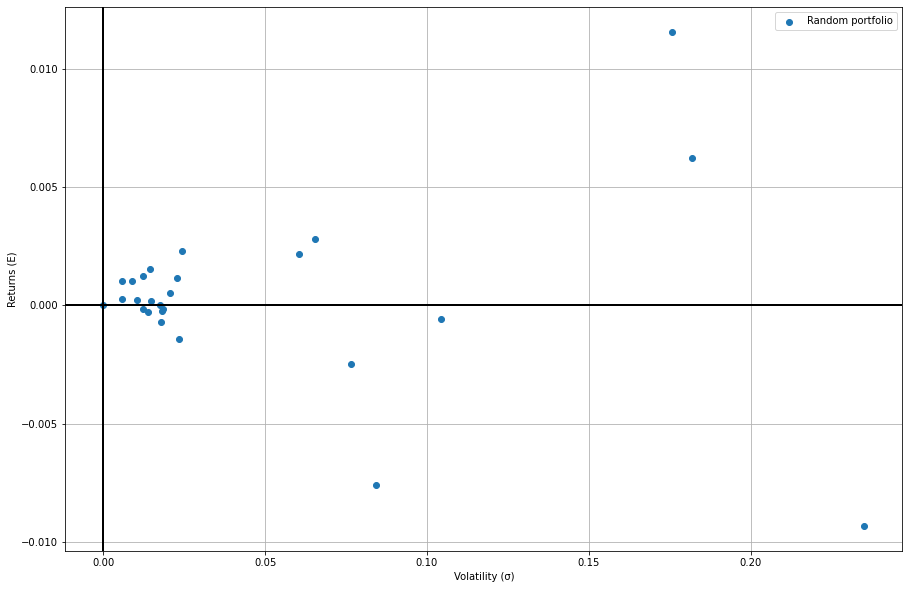

In [115]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

# random portfolios plot
ax.scatter(sample_std_devs50, sample_means50, marker="o", label="Random portfolio")
   
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

### Сгенерируем несколько случайных портфелей и изобразим их на графике

In [116]:
def calc_portfolio_return(x, means): # доходность портфеля, принимает np.array
    #E = sum(means.iloc[0:n_stocks] * x)
    #E = np.matmul(x, means)
    E = np.matmul(x, means.to_numpy())
    E = float(E)
    return E

def calc_portfolio_volatility(x, cov_matrix): # риск портфеля, хотим найти такой вектор весов x, что риск стремится к минимуму
    #sigma_sq = np.matmul(np.matmul(x, cov_matrix), x.T)
    sigma_sq = np.matmul(np.matmul(x, cov_matrix.to_numpy()), x.T)
    sigma_sq = float(sigma_sq)
    return sigma_sq

def generate_random_portfolios(means, cov_matrix, short_sales=False, n_portfolios=10000):
      
    n_stocks = means.shape[0]
    
    portfolio_means = [] # returns per portfolio
    portfolio_std_devs = [] # standard deviations per portfolio
    
    x_range = () # область значений веса акции в портфеле
    if short_sales:
        x_range = (-1, 1)
    else:
        x_range = (0, 1)
        
    for portfolio in range(n_portfolios):
        x = np.random.uniform(x_range[0], x_range[1],n_stocks)
        x = x/sum(x) # нормализация
        #x = x/abs(sum(x)) # weird
        x = np.array(x)
        #print(x, x.sum())
        #portfolio_sample_means.append(sum(sample_means.iloc[0:n_stocks] * x)) # R - доходность       
        #portfolio_std_devs.append(np.matmul(np.matmul(x, covariance_matrix.iloc[0:n_stocks, 0:n_stocks]), x.T)) # риски    
        portfolio_means.append(calc_portfolio_return(x, means))
        portfolio_std_devs.append(calc_portfolio_volatility(x, cov_matrix))
        
    return portfolio_std_devs, portfolio_means

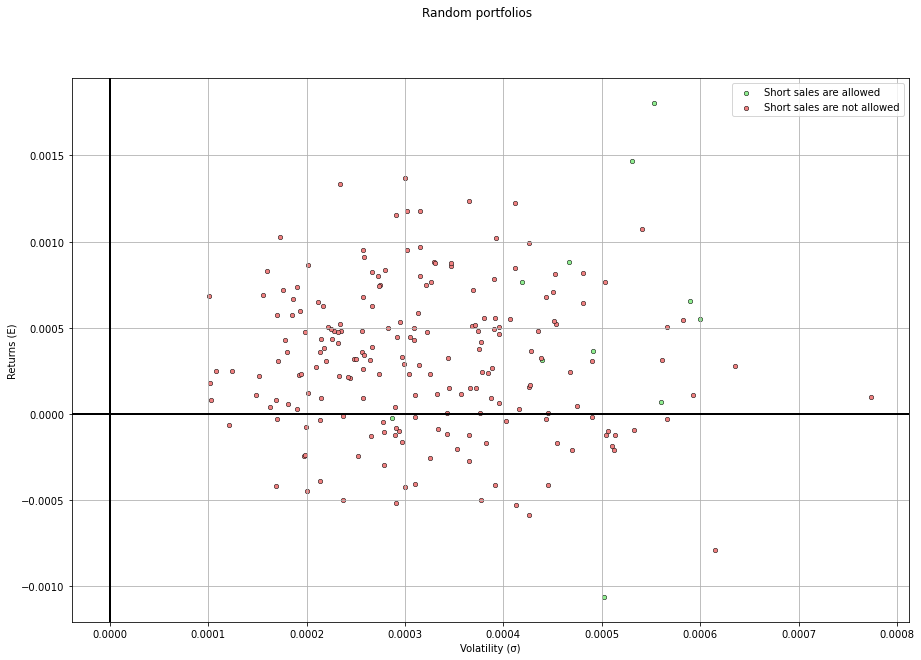

In [117]:
random_portfolios_short_std_devs, random_portfolios_short_means = generate_random_portfolios(sample_means50, sample_cov50, short_sales=True, n_portfolios=1000)
random_portfolios_no_short_std_devs, random_portfolios_no_short_means = generate_random_portfolios(sample_means50, sample_cov50, short_sales=False, n_portfolios=200)

# удаление слишком больших значений 
indices = [ind for ind in range(len(random_portfolios_short_std_devs)) if random_portfolios_short_std_devs[ind] < 0.0006]
indices = [ind for ind in indices if random_portfolios_short_means[ind] < 0.01]
random_portfolios_short_std_devs = [random_portfolios_short_std_devs[i] for i in indices]
random_portfolios_short_means = [random_portfolios_short_means[i] for i in indices]

fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Random portfolios")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

# random portfolios plot
ax.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are allowed")
ax.scatter(random_portfolios_no_short_std_devs, random_portfolios_no_short_means, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are not allowed")

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

### Найдем фронты эффективных портфелей

In [118]:
def optimize_portfolio_volatility(means, cov_matrix, short_sales=True, custom_return=False, target_return=None): # x - weights of a portfolio
    n_stocks = means.shape[0]
    
    # Генерация случайного начального решения 
    x_initial = np.random.random(n_stocks)
    #x_initial = np.ones(n_stocks)
    x_initial = x_initial/np.sum(x_initial) # нормализация
    x_initial = np.array(x_initial)
    
    #print(f"X initial for {n_stocks}: {x_initial}")
    
    # Ограничения 
    
    constraints = [{'type': 'eq',
                    'fun': lambda x: x.sum() - 1.0
                   }]
    
    # если хотим найти наименьшее значение риска портфеля при заданном уровне доходности
    if custom_return:
        if target_return is None:
            print("Target Return is not set!")
            return 
        else:
            constraints.append({'type': 'eq', 
                                'fun': lambda x: calc_portfolio_return(x, means) - target_return
                               })
            print(f"Looking for a solution for {target_return}")
            
    # Ограничения на область значений x
    x_bounds = []
    if short_sales:
        # шорты разрешены, x принимает любое значение
        for i in range(n_stocks):
            x_bounds.append((None, None))
    else:
        # шорты запрещены, x принимает значение от 0 до 1
        for i in range(n_stocks):
            x_bounds.append((0, 1))        
  
    result = scipy.optimize.minimize(calc_portfolio_volatility, # функция, которую хотим оптимизировать
                                     x_initial, # начальное решение 
                                     args=(cov_matrix), # дополнительные аргументы целевой функции
                                     method='SLSQP', # метод оптимизации (МНК)
                                     constraints=constraints, # ограничения 
                                     bounds=x_bounds, # ограничения на значения x
                                     options={'maxiter':1000, 'disp': False},
                                     tol=1e-15 # tolerance? somehow fixes the issue lol 1e-15
                                    )
    
    if result.success:
        return result.x
    else:
        print("Couldn't find minimum")
        return

#### Оптимальный портфель с разрешенными короткими продажами

In [119]:
x_opt_short = optimize_portfolio_volatility(sample_means50, sample_cov50, short_sales=True)

opt_short_return = calc_portfolio_return(x_opt_short, sample_means50)
opt_short_volatility = calc_portfolio_volatility(x_opt_short, sample_cov50)
print(f"Pareto optimal Portfolio (short sales are allowed)\n {x_opt_short} ")
print(f"Portfolio's Volatility: {opt_short_volatility}, Return: {opt_short_return}")

Pareto optimal Portfolio (short sales are allowed)
 [ 2.67687349e-05 -2.91231540e-07  4.98550829e-08 -3.80918030e-06
 -3.16204181e-07 -4.16785895e-08  7.66607815e-06  5.49452949e-08
 -7.51380814e-06 -4.59674566e-06  3.74418556e-06  1.05673085e-05
  2.29954017e-05  3.72852905e-06  1.79244880e-05 -2.00324274e-06
  9.99999263e-01 -8.77450456e-07 -5.08416734e-06 -8.72069174e-07
  2.48077532e-07 -5.91217715e-08  1.20943553e-05 -7.43961800e-05
 -1.07075870e-06 -4.17348848e-06] 
Portfolio's Volatility: 5.787617839612605e-13, Return: 5.552889478041398e-08


#### Эффективный фронт с разрешенными короткими продажами

Looking for a solution for 5.552889478041398e-08
Looking for a solution for 0.00044449380346202707
Looking for a solution for 0.0008889320780292737
Looking for a solution for 0.0013333703525965205
Looking for a solution for 0.0017778086271637672
Looking for a solution for 0.002222246901731014
Looking for a solution for 0.0026666851762982605
Looking for a solution for 0.003111123450865507
Looking for a solution for 0.003555561725432754
Looking for a solution for 0.004


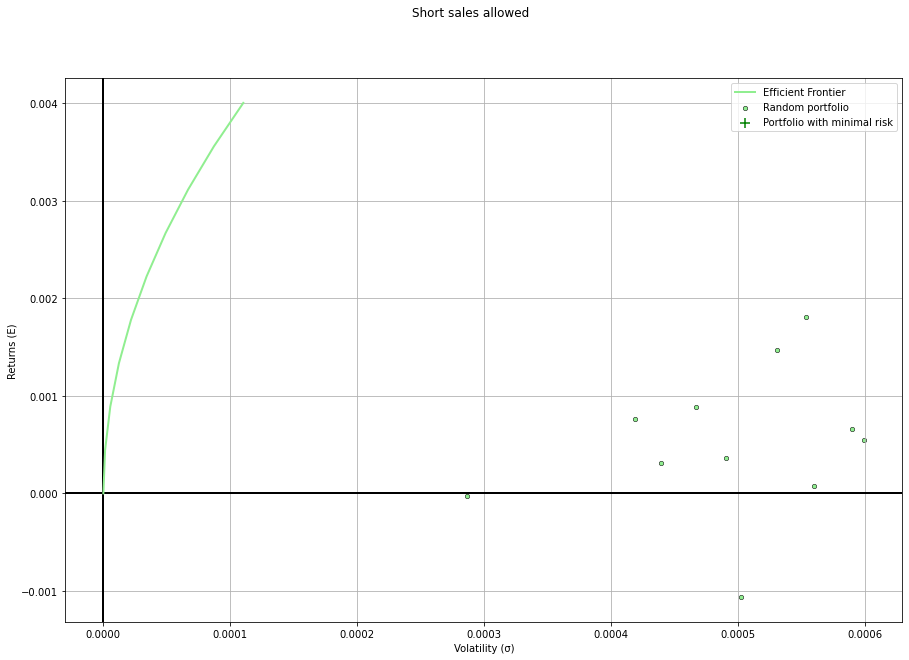

In [120]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Short sales allowed")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')


# random portfolios plot
#ax.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="g", s=2, label="Random portfolio")
ax.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Random portfolio")

# optimal frontier plot
target_returns_short = np.linspace(opt_short_return, 0.004, 10)
opt_volatilities_short = []

for target_return in target_returns_short:
    x_opt = optimize_portfolio_volatility(sample_means50, sample_cov50, short_sales=True, custom_return=True, target_return=target_return)
    #opt_return = calc_portfolio_return(x_opt, sample_means50)
    opt_volatility = calc_portfolio_volatility(x_opt, sample_cov50)
    opt_volatilities_short.append(opt_volatility)

# min risk plot 
ax.scatter(opt_short_volatility, opt_short_return, color="g", marker="+", s=100, label="Portfolio with minimal risk")    
    
ax.plot(opt_volatilities_short, target_returns_short, color="lightgreen", linewidth=2, label="Efficient Frontier")      
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

#### Оптимальный портфель с запрещенными короткими продажами

In [121]:
x_opt_no_short = optimize_portfolio_volatility(sample_means50, sample_cov50, short_sales=False)

opt_no_short_return = calc_portfolio_return(x_opt_no_short, sample_means50)
opt_no_short_volatility = calc_portfolio_volatility(x_opt_no_short, sample_cov50)
print(f"Pareto optimal Portfolio (short sales are NOT allowed)\n {x_opt_no_short} ")
print(f"Portfolio's Volatility: {opt_no_short_volatility}, Return: {opt_no_short_return}")

Pareto optimal Portfolio (short sales are NOT allowed)
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.87386920e-08
 2.36881003e-08 1.57394744e-23 8.54511900e-23 5.86373730e-25
 1.88491916e-08 6.62397222e-08 0.00000000e+00 0.00000000e+00
 2.24935641e-08 4.52775411e-07 0.00000000e+00 1.65478523e-09
 9.99999277e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.61352783e-23 0.00000000e+00 0.00000000e+00 1.03682062e-23
 3.34209263e-08 5.46853678e-09] 
Portfolio's Volatility: 2.2708912786075285e-17, Return: -1.6032676653440808e-10


#### Эффективный фронт с разрешенными короткими продажами

Looking for a solution for -1.6032676653440808e-10
Looking for a solution for 0.00033333319082065203
Looking for a solution for 0.0006666665419680706
Looking for a solution for 0.000999999893115489
Looking for a solution for 0.0013333332442629076
Looking for a solution for 0.001666666595410326
Looking for a solution for 0.0019999999465577446
Looking for a solution for 0.0023333332977051634
Looking for a solution for 0.0026666666488525817
Looking for a solution for 0.003


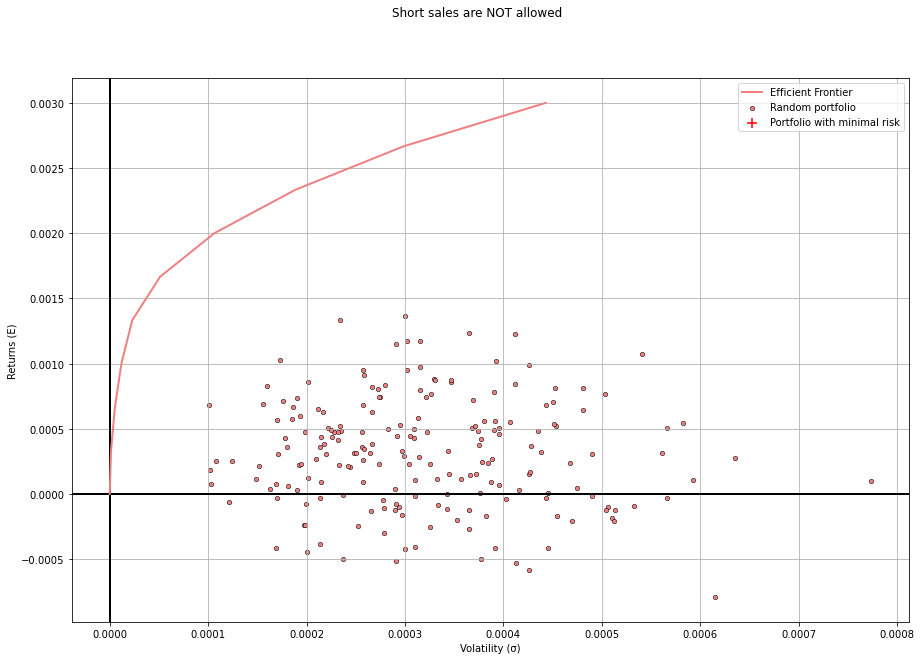

In [122]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Short sales are NOT allowed")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

# random portfolios plot
ax.scatter(random_portfolios_no_short_std_devs, random_portfolios_no_short_means, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Random portfolio")

# optimal frontier plot
target_returns_no_short = np.linspace(opt_no_short_return, 0.003, 10)
opt_volatilities_no_short = []

for target_return in target_returns_no_short:
    x_opt = optimize_portfolio_volatility(sample_means50, sample_cov50, short_sales=False, custom_return=True, target_return=target_return)
    #opt_return = calc_portfolio_return(x_opt, sample_means50)
    opt_volatility = calc_portfolio_volatility(x_opt, sample_cov50)
    opt_volatilities_no_short.append(opt_volatility)

# min risk plot 
ax.scatter(opt_no_short_volatility, opt_no_short_return, color="r", marker="+", s=100, label="Portfolio with minimal risk")  
    
ax.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier")      
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

### Изобразим на одном графике эффективные фронты, и оптимальные портфели

In [123]:
# рассчитаем доходность и риск портфеля с равными долями и индекса рынка

# генерация портфеля с равными долями
n_stocks = sample_means50.shape[0]
x_eq_w = np.ones(n_stocks) # x equally weighted, i. e. equally weighted portfolio 
x_eq_w = x_eq_w/np.sum(x_eq_w) # нормализация
x_eq_w = np.array(x_eq_w)

# рассчет доходности и риска портфеля с равными долями
eq_w_volatility = calc_portfolio_volatility(x_eq_w, sample_cov50)
eq_w_return = calc_portfolio_return(x_eq_w, sample_means50)

# рассчет доходности и риска индекса рынка 
index_volatility = np.std(index_log_returns['NSEI'])
index_return = np.mean(index_log_returns['NSEI'])

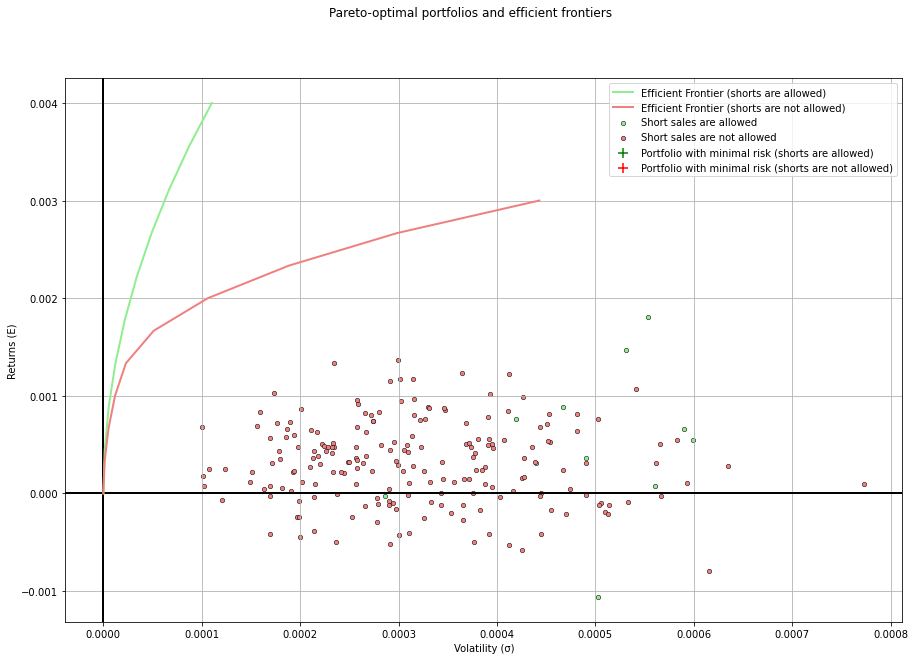

In [124]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Pareto-optimal portfolios and efficient frontiers")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

# random portfolios plot
ax.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are allowed")
ax.scatter(random_portfolios_no_short_std_devs, random_portfolios_no_short_means, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are not allowed")

# optimal frontier plot
ax.plot(opt_volatilities_short, target_returns_short, color="lightgreen", linewidth=2, label="Efficient Frontier (shorts are allowed)")
ax.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (shorts are not allowed)") 

# min risk plot 
ax.scatter(opt_short_volatility, opt_short_return, color="g", marker="+", s=100, label="Portfolio with minimal risk (shorts are allowed)")
ax.scatter(opt_no_short_volatility, opt_no_short_return, color="r", marker="+", s=100, label="Portfolio with minimal risk (shorts are not allowed)")

# equally weighted portfolio plot
#ax.scatter(eq_w_volatility, eq_w_return, color="b", marker="X", s=100, label="Equally weighted portfolio")

# market index plot
#ax.scatter(index_volatility, index_return, color="y", marker="X", s=100, label="Market index")

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

На графике видно, что эффективный фронт с запрещенными короткими продажами находится ниже, чем эффективным фронт с разрешенными короткими продажами, что говорит о том, что при равных рисках доходность на эффективном фронте с разрешенными короткими продажами всегда выше.
Оптимальные портфели тоже отличаются. При разрешенных коротких продажах оптимальный портфель имеет меньший риск и меньшую доходность, чем оный при запрещенный коротких продажах.

### Добавим на график портфель с равными долями и индекс рынка

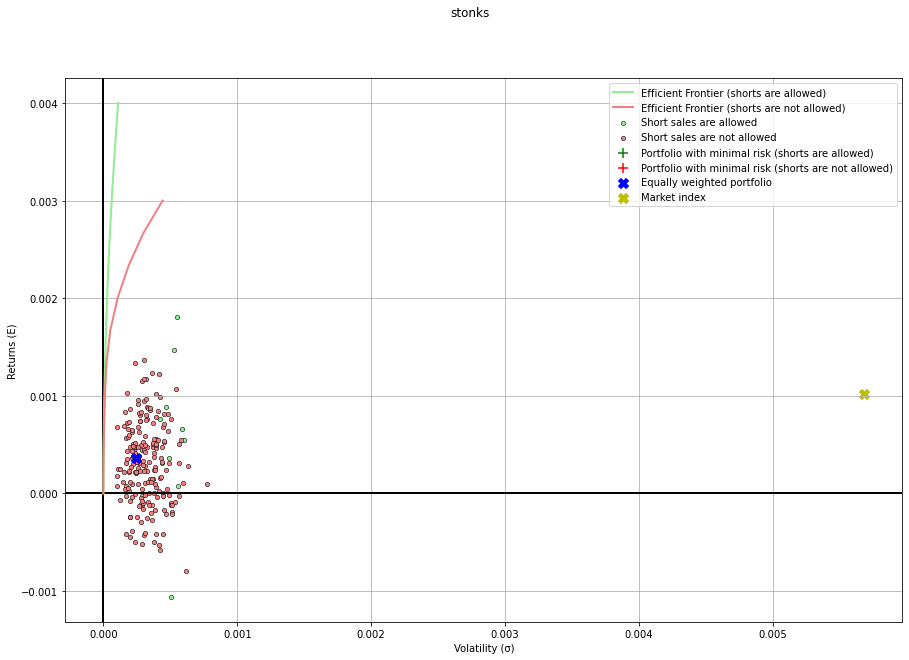

In [125]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("stonks")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

# random portfolios plot
ax.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are allowed")
ax.scatter(random_portfolios_no_short_std_devs, random_portfolios_no_short_means, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Short sales are not allowed")

# optimal frontier plot
ax.plot(opt_volatilities_short, target_returns_short, color="lightgreen", linewidth=2, label="Efficient Frontier (shorts are allowed)")
ax.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (shorts are not allowed)") 

# min risk plot 
ax.scatter(opt_short_volatility, opt_short_return, color="g", marker="+", s=100, label="Portfolio with minimal risk (shorts are allowed)")
ax.scatter(opt_no_short_volatility, opt_no_short_return, color="r", marker="+", s=100, label="Portfolio with minimal risk (shorts are not allowed)")

# equally weighted portfolio plot
ax.scatter(eq_w_volatility, eq_w_return, color="b", marker="X", s=100, label="Equally weighted portfolio")

# market index plot
ax.scatter(index_volatility, index_return, color="y", marker="X", s=100, label="Market index")

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

Индекс рынка имеет риск гораздо выше, чем риски остальных портфелей. Стоит отметить, что портфель с равными весами имеет риск гораздо меньший при примерно равных доходностях.

## 2. Portfolio selection problem. 
Требуется построить «хорошие» инвестиционные портфели из 10 
активов вместо исходных 50 (или даже всех активов рынка). Предложите способ выбрать 10 активов 
(из отобранных ранее 50) для формирования портфеля. Сравните эффективные фронты всего набора 
(50 акций)  и выбранного набора активов (10 акций) для двух случаев
- короткие продажи разрешены, 
- короткие продажи запрещены.

### Рассчитаем коэффициент шарпа для всех 50 активов и выберем 10 активов с наибольшим его значением.
В качестве безрискового актива положим "виртуальный" актив с доходностью 0.001.

In [126]:
risk_free_return = 0.001

sharpe_ratios50 = pd.DataFrame((sample_means50 - risk_free_return).values * sample_std_devs50.values**(-1), 
                               columns=['Sharpe ratio'], 
                               index=sample_means50.index)

In [127]:
sharpe_ratios10 = sharpe_ratios50.sort_values(by=['Sharpe ratio'], ascending=False)[0:10]

tickers10 = list(sharpe_ratios10.index)
#tickers10 = tickers50[0:10]

sample_means10 = sample_means50.loc[tickers10]
sample_cov10 = sample_cov50.loc[tickers10][tickers10]

In [128]:
# optimal frontier for 10 stocks with short sales
x_opt_short10 = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=True)

opt_short_return10 = calc_portfolio_return(x_opt_short10, sample_means10)
#opt_short_volatility10 = calc_portfolio_volatility(x_opt_short10, sample_cov10)

target_returns_short10 = np.linspace(opt_short_return10, 0.004, 10)
opt_volatilities_short10 = []

for target_return in target_returns_short10:
    x_opt = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=True, custom_return=True, target_return=target_return)
    #opt_return = calc_portfolio_return(x_opt, sample_means50)
    opt_volatility = calc_portfolio_volatility(x_opt, sample_cov10)
    opt_volatilities_short10.append(opt_volatility)

Looking for a solution for 0.0011479078904168601
Looking for a solution for 0.0014648070137038758
Looking for a solution for 0.0017817061369908914
Looking for a solution for 0.0020986052602779068
Looking for a solution for 0.0024155043835649226
Looking for a solution for 0.002732403506851938
Looking for a solution for 0.0030493026301389534
Looking for a solution for 0.0033662017534259693
Looking for a solution for 0.0036831008767129847
Looking for a solution for 0.004


In [129]:
# optimal frontier for 10 stocks with no short sales
x_opt_no_short10 = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=False)

opt_no_short_return10 = calc_portfolio_return(x_opt_no_short10, sample_means10)
#opt_short_volatility10 = calc_portfolio_volatility(x_opt_short10, sample_cov10)

target_returns_no_short10 = np.linspace(opt_no_short_return10, 0.0031, 10)
opt_volatilities_no_short10 = []

for target_return in target_returns_no_short10:
    x_opt = optimize_portfolio_volatility(sample_means10, sample_cov10, short_sales=False, custom_return=True, target_return=target_return)
    #opt_return = calc_portfolio_return(x_opt, sample_means50)
    opt_volatility = calc_portfolio_volatility(x_opt, sample_cov10)
    opt_volatilities_no_short10.append(opt_volatility)

Looking for a solution for 0.0011479078598622856
Looking for a solution for 0.001364806986544254
Looking for a solution for 0.0015817061132262222
Looking for a solution for 0.0017986052399081903
Looking for a solution for 0.002015504366590159
Looking for a solution for 0.002232403493272127
Looking for a solution for 0.002449302619954095
Looking for a solution for 0.0026662017466360633
Looking for a solution for 0.0028831008733180316
Looking for a solution for 0.0031


### Изобразим эффективные фронты на графике

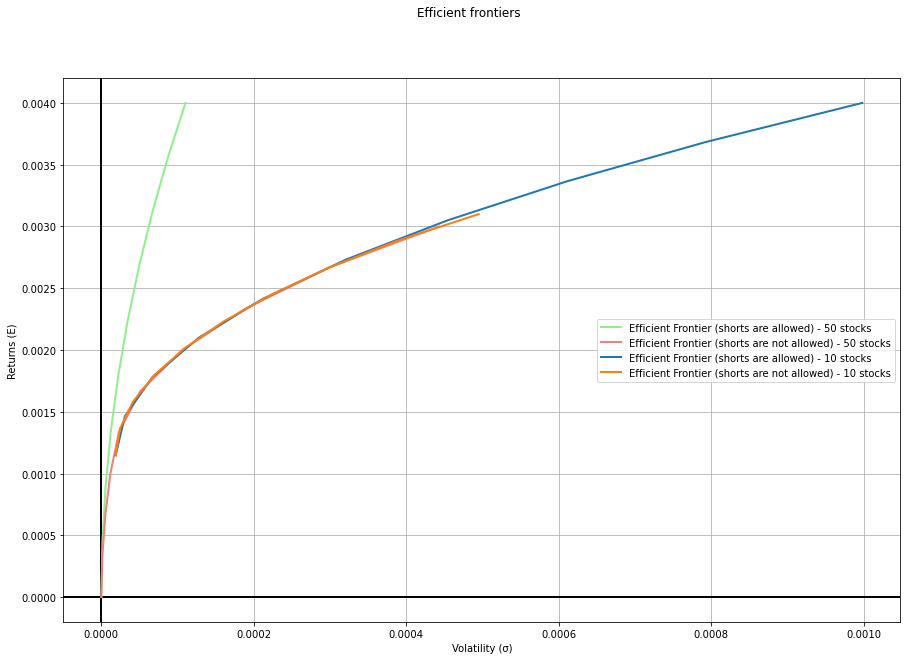

In [130]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Efficient frontiers")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

# optimal frontier plot
ax.plot(opt_volatilities_short, target_returns_short, color="lightgreen", linewidth=2, label="Efficient Frontier (shorts are allowed) - 50 stocks")
ax.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (shorts are not allowed) - 50 stocks") 

ax.plot(opt_volatilities_short10, target_returns_short10, color="C0", linewidth=2, label="Efficient Frontier (shorts are allowed) - 10 stocks")
ax.plot(opt_volatilities_no_short10, target_returns_no_short10, color="C1", linewidth=2, label="Efficient Frontier (shorts are not allowed) - 10 stocks") 

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

Эффективный фронт с разрешенными короткими продажами у портфеля из 50 активов более приятный, чем у портфеля из 10 активов, что говорит о том, что при одинаковом значении доходности риски у портфелей из 50 активов ниже.
Можно заметить, что эффективный фронт с запрещенными продажами начиная со значения доходности 0.0011 совпадает у портфеля из 10 и 50 активов.

## 3. Risk aversion. 
Оцените свое отношение к риску и постройте свой личный оптимальный портфель 
инвестиций из выбранных 50 активов.  Дайте характеристику портфеля по составу и долям активов. 
Оцените VaR доходностей портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.

In [131]:
def obj_func(X, returns, alpha, cov_matr):
    return - np.dot(returns, X) + alpha * calc_portfolio_volatility(X, cov_matr)
    
def get_portfolio_with_min_risk(obj_func, returns, cov_matr, alpha, bounds, tick_num):
    X = np.ones(tick_num)
    X = X/X.sum()
    bounds = bounds*tick_num
    
    constraints = []
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    
    return minimize(obj_func, X,
                    args=(returns, alpha, cov_matr), method='SLSQP', #МНК
                    constraints=constraints,
                    bounds=bounds).x

In [132]:
def risk_aversion(dist, alpha):
    tick_num = len(tickers50) 
    E = sample_means50['Sample mean (E)'].values 
    returns = log_returns50
    returns = returns.drop("Date", 1)
    bounds = ((-1, 1),) if dist=='short' else ((0, 1),)
    
    portfolio_weights = get_portfolio_with_min_risk(obj_func, E, sample_cov50, alpha, bounds, tick_num)
    
    min_std = calc_portfolio_volatility(portfolio_weights, sample_cov50)
    min_E = np.dot(portfolio_weights, E)
    losses = - np.dot(returns, portfolio_weights)
    return min_std, min_E, losses, portfolio_weights

## Короткие продажи разрешены
###Рассчитаем веса при 5-ти различных уровнях α: [1, 2, 3, 4, 5] и отметим полученные портфели на карте активов:

In [133]:
std1, E1, losses1, X1 = risk_aversion(dist='short', alpha=1)
std2, E2, losses2, X2 = risk_aversion(dist='short', alpha=2)
std3, E3, losses3, X3 = risk_aversion(dist='short', alpha=3)
std4, E4, losses4, X4 = risk_aversion(dist='short', alpha=4)
std5, E5, losses5, X5 = risk_aversion(dist='short', alpha=5)

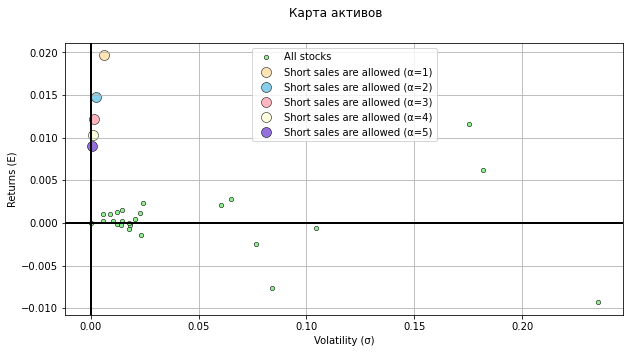

In [134]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Карта активов")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

ax.scatter(sample_std_devs50['Sample standard deviation (σ)'], sample_means50['Sample mean (E)'], marker="o", 
           color='lightgreen', edgecolors= 'black', linewidth=0.5, s=20, label='All stocks')
ax.scatter(std1, E1, marker="o", color='moccasin',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=1)")
ax.scatter(std2, E2, marker="o", color='skyblue',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=2)")
ax.scatter(std3, E3, marker="o", color='lightpink',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=3)")
ax.scatter(std4, E4, marker="o", color='lightyellow',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=4)")
ax.scatter(std5, E5, marker="o", color='mediumpurple',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are allowed (α=5)")

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

Как видно по графику, портфель с отношением к риску α=5 имеет самый низкий показатель стандартного отклонения. 
### Построим столбчатую диаграмму, чтобы визуализировать рассчитанные веса при α=5:

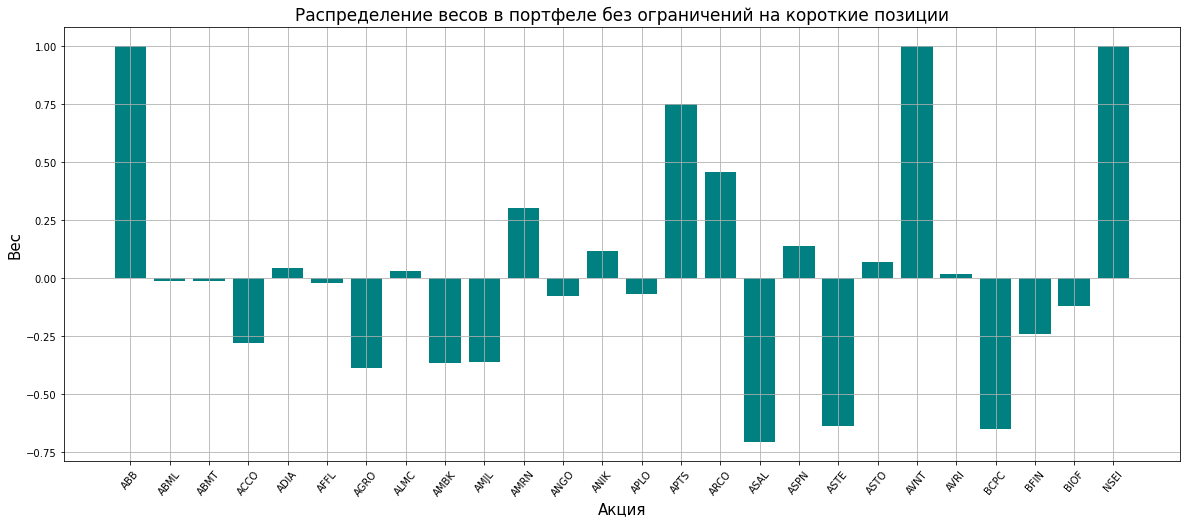

In [135]:
min_std1, min_E1, losses1, portfolio_weights1 = risk_aversion(dist='short', alpha=5)

weights_data = pd.DataFrame(index = tickers50, columns = ['weight'])
weights_data['weight'] = portfolio_weights1

plt.figure(figsize = (20,8))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Акция', fontsize = 15)
plt.ylabel('Вес', fontsize = 15)
plt.bar(x, height = weights_data['weight'], color="teal")
plt.xticks(x, x_values, rotation='50')
plt.title("Распределение весов в портфеле без ограничений на короткие позиции", fontsize = 17)
plt.grid()

Самые маленькие веса:
1. ABML - финансы
2. ABMT - промышленность
3. AFFL - услуги связи
4. ALMC - недвижимость
5. AVRI - потребительский сектор

Самые большие веса:
1. ABB - промышленность
2. AVNT - производитель товаров массового потребления
3. APTS - финансы
4. ASAL - производитель товаров массового потребления
5. ASTE - материалы
6. BCPC - промышленность

Портфель очень разнообразен по составу. По большим весам можно заметить, что лидируют производители товаров массового потребления и промышленность.

### Теперь оценим VaR доходностей этого портфеля:

In [136]:
сonfidence_levels = [0.9, 0.95, 0.99]
VaR = {}

print('VaR для портфеля с отношением к риску α=5 без ограничений на короткие позиции:')

for level in сonfidence_levels:
    VaR[level] = np.quantile(losses1, level)
    print('- Потери не превысят %.5f с уверенностью %.f%s.' % (np.round(VaR[level],5), level*100, '%'))

VaR для портфеля с отношением к риску α=5 без ограничений на короткие позиции:
- Потери не превысят 0.02370 с уверенностью 90%.
- Потери не превысят 0.02941 с уверенностью 95%.
- Потери не превысят 0.04636 с уверенностью 99%.


### Короткие продажи запрещены
Снова рассчитаем веса при 5-ти различных уровнях α: [1, 2, 3, 4, 5] и отметим полученные портфели на карте активов:

In [137]:
std11, E11, losses11, X11 = risk_aversion(dist='short_sales_are_not_allowed', alpha=1)
std22, E22, losses22, X22 = risk_aversion(dist='short_sales_are_not_allowed', alpha=2)
std33, E33, losses33, X33 = risk_aversion(dist='short_sales_are_not_allowed', alpha=3)
std44, E44, losses44, X44 = risk_aversion(dist='short_sales_are_not_allowed', alpha=4)
std55, E55, losses55, X55 = risk_aversion(dist='short_sales_are_not_allowed', alpha=5)

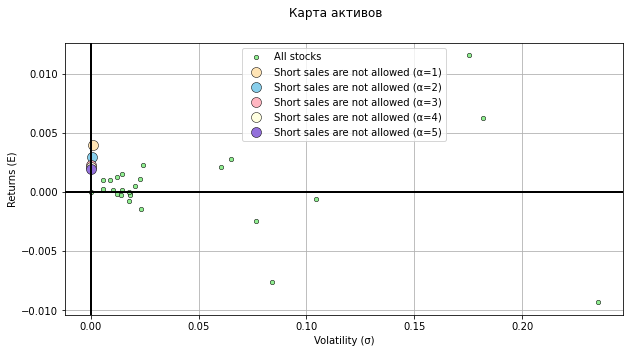

In [138]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Карта активов")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

ax.scatter(sample_std_devs50['Sample standard deviation (σ)'], sample_means50['Sample mean (E)'], marker="o", 
           color='lightgreen', edgecolors= 'black', linewidth=0.5, s=20, label='All stocks')
ax.scatter(std11, E11, marker="o", color='moccasin',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are not allowed (α=1)")
ax.scatter(std22, E22, marker="o", color='skyblue',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are not allowed (α=2)")
ax.scatter(std33, E33, marker="o", color='lightpink',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are not allowed (α=3)")
ax.scatter(std44, E44, marker="o", color='lightyellow',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are not allowed (α=4)")
ax.scatter(std55, E55, marker="o", color='mediumpurple',
           edgecolors= 'black', linewidth=0.5, s=100, label="Short sales are not allowed (α=5)")

ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

Самое низкое стандартное отклонение имеет портфель, построенный с отношением к риску α=5. Визуализируем распределение весов между компаниями в этом портфеле:

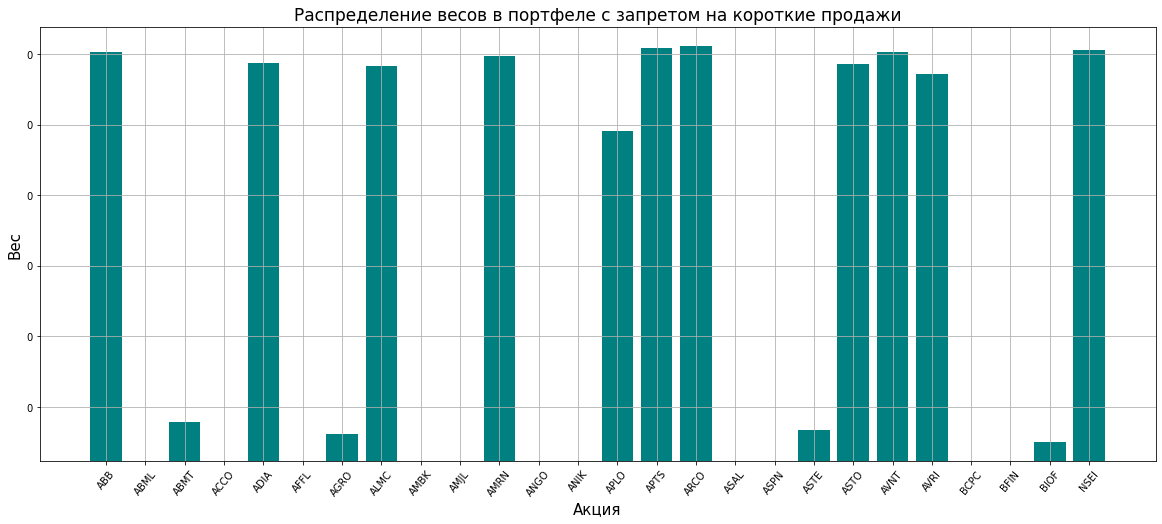

In [139]:
min_std2, min_E2, losses2, portfolio_weights2 = risk_aversion(dist='short_sales_are_not_allowed', alpha=5)

weights_data1 = pd.DataFrame(index = tickers50, columns = ['weight'])
weights_data1['weight'] = portfolio_weights2

plt.figure(figsize = (20,8))
x = np.arange(weights_data1.shape[0])
x_values = weights_data1.index
plt.xlabel('Акция', fontsize = 15)
plt.ylabel('Вес', fontsize = 15)
plt.bar(x, height = weights_data1['weight'], color='teal')
plt.xticks(x, x_values, rotation='50')
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.title("Распределение весов в портфеле с запретом на короткие продажи", fontsize = 17)
plt.grid()

Как видно по графику, наибольшие веса у компаний:

1. ABB - промышленность
2. ADIA - потребительский сектор
3. AGRO - производители товаров массового потребления
4. ALMC - недвижимость
5. AMRN - производители товаров массового потребления
6. APLO - потребительский сектор
7. APTS - финансы
8. ARCO - материалы
9. ASTO - материалы
10. AVNT - производители товаров массового потребления
11. AVRI - потребительский сектор

Таким образом, приоритетными отраслями являются производители товаров массового потребления и потребительский сектор.

### Оценим VaR доходностей этого портфеля:

In [140]:
сonfidence_levels = [0.9, 0.95, 0.99]
VaR = {}

print('VaR для портфеля с отношением к риску α=5 с запретом на короткие продажи:')

for level in сonfidence_levels:
    VaR[level] = np.quantile(losses2, level)
    print('- Потери не превысят %.5f с уверенностью %.f%s.' % (np.round(VaR[level],5), level*100, '%'))

VaR для портфеля с отношением к риску α=5 с запретом на короткие продажи:
- Потери не превысят 0.00828 с уверенностью 90%.
- Потери не превысят 0.01123 с уверенностью 95%.
- Потери не превысят 0.01818 с уверенностью 99%.


## 4. Risk aversion  and Portfolio selection. 
Используя выбранное  в п.3 отношение к риску постройте  
оптимальный портфель из 10 активов (вместо 50, см. п.2). Дайте характеристику этого портфеля по 
составу активов и долям инвестиций. Сравните с портфелем п.3. Оцените VaR доходностей 
портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.

Можно ли ваш портфель из 10 активов улучшить, оставаясь в рамках 10 активов из выбранных ранее 
50 активов?

In [141]:
#10 компаний, выбранных с помощью коэффициента Шарпа в п.2.
tickers10

['ALMC', 'ARCO', 'APTS', 'AVRI', 'ADIA', 'AVNT', 'ASTO', 'AMRN', 'ABB', 'NSEI']

In [142]:
log_returns10 = log_returns50[tickers10]

def risk_aversion_v2(dist, alpha):
    tick_num = len(tickers10) 
    E = sample_means10['Sample mean (E)'].values 
    returns = log_returns10
    bounds = ((-1, 1),) if dist=='short' else ((0, 1),)
    
    portfolio_weights = get_portfolio_with_min_risk(obj_func, E, sample_cov10, alpha, bounds, tick_num)
    
    min_std = calc_portfolio_volatility(portfolio_weights, sample_cov10)
    min_E = np.dot(portfolio_weights, E)
    losses = - np.dot(returns, portfolio_weights)
    return min_std, min_E, losses, portfolio_weights

### Короткие продажи разрешены
Построим оптимальный портфель с отношением к риску α=5:

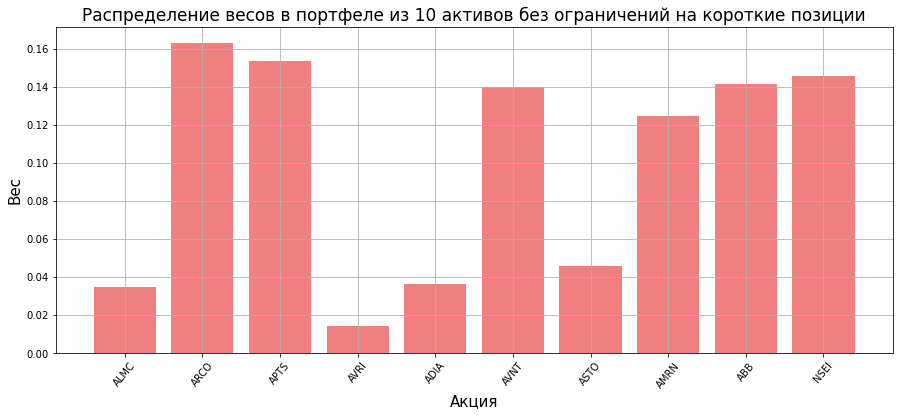

In [143]:
std_short, E_short, loss_short, weights_short = risk_aversion_v2(dist='short', alpha=5)
std_short_1, E_short_1, loss_short_1, weights_short_1 = std_short, E_short, loss_short, weights_short

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_short

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Акция', fontsize = 15)
plt.ylabel('Вес', fontsize = 15)
plt.bar(x, height = weights_data['weight'], color="lightcoral")
plt.xticks(x, x_values, rotation='50')
plt.title("Распределение весов в портфеле из 10 активов без ограничений на короткие позиции", fontsize = 17)
plt.grid()

#### Список компаний в порядке убывания веса в портфеле:
1. ARCO - материалы
2. APTS - финансы
3. ABB - промышленность
4. AVNT - производители товаров массового потребления
5. AMRN - производители товаров массового потребления
6. ASTO - материалы 
7. ADIA - потребительский сектор
8. ALMC - недвижимость
9. AVRI - потребительский сектор

Следует отметить, что первые 6 компаний из вышеприведенного списка также занимают лидирующие позиции по весам в портфеле, построенном в п.3. Что касается компаний под номерами 7-10, в портфеле из 50-ти активов они также имели минимальные веса.

Если говорить об отраслевом составе портфеля, то здесь ничего кардинально не изменилось: большинство компаний в портфеле принадлежат к отраслям производители товаров массового потребления и потребительский сектор.

#### Оценим VaR доходностей этого портфеля:

In [144]:
сonfidence_levels = [0.9, 0.95, 0.99]
VaR = {}

print('VaR для портфеля из 10 активов с отношением к риску α=5 без запрета на короткие продажи:')

for level in сonfidence_levels:
    VaR[level] = np.quantile(loss_short, level)
    print('- Потери не превысят %.5f с уверенностью %.f%s.' % (np.round(VaR[level],5), level*100, '%'))

VaR для портфеля из 10 активов с отношением к риску α=5 без запрета на короткие продажи:
- Потери не превысят 0.00775 с уверенностью 90%.
- Потери не превысят 0.01090 с уверенностью 95%.
- Потери не превысят 0.01627 с уверенностью 99%.


### Короткие продажи запрещены
Построим оптимальный портфель с отношением к риску α=5.

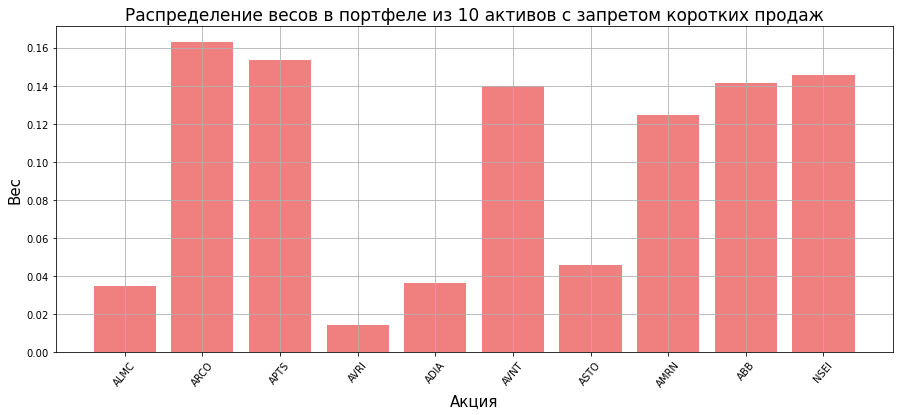

In [145]:
std_not_short, E_not_short, loss_not_short, weights_not_short = risk_aversion_v2(dist='short_sales_are_not_allowed', alpha=5)
std_not_short_1, E_not_short_1, loss_not_short_1, weights_not_short_1 = std_not_short, E_not_short, loss_not_short, weights_not_short 

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_not_short

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Акция', fontsize = 15)
plt.ylabel('Вес', fontsize = 15)
plt.bar(x, height = weights_data['weight'], color="lightcoral")
plt.xticks(x, x_values, rotation='50')
plt.title("Распределение весов в портфеле из 10 активов с запретом коротких продаж", fontsize = 17)
plt.grid()

При добавлении ограничений на короткие позиции, распределение долей в портфеле осталось примерно таким же. 

Если сравнивать этот портфель с портфелем, построенном в п.3. с запретом на короткие позиции, то можно заметить, что паттерн распределения долей инвестиций примерно одинаков. В портфеле из 10-ти активов она занимает последние позиции по весу, в то время как в портфеле из 50-ти активов она находится в числе лидеров по долям инвестирования.

### Оценим VaR доходностей этого портфеля:

In [146]:
сonfidence_levels = [0.9, 0.95, 0.99]
VaR = {}

print('VaR для портфеля из 10 активов с отношением к риску α=5 с запретом на короткие продажи:')

for level in сonfidence_levels:
    VaR[level] = np.quantile(loss_not_short, level)
    print('- Потери не превысят %.5f с уверенностью %.f%s.' % (np.round(VaR[level],5), level*100, '%'))

VaR для портфеля из 10 активов с отношением к риску α=5 с запретом на короткие продажи:
- Потери не превысят 0.00775 с уверенностью 90%.
- Потери не превысят 0.01090 с уверенностью 95%.
- Потери не превысят 0.01627 с уверенностью 99%.


## 5. Markowitz-Tobin model. 
Рассмотрите набор активов, отобранных в п.2 (10 активов).  Выберете  
безрисковый актив (можно виртуальный). Постройте рыночный (оптимальный)  портфель. Сделайте 
анализ долей активов рыночного портфеля. Оцените VaR доходностей портфеля. Рассмотрите два 
случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.

In [147]:
sample_std_devs10 = pd.DataFrame(data= pd.DataFrame(np.diag(sample_cov10)**0.5,
                                columns = ['Sample standard deviation (σ)'],
                                index = tickers10))
#10 компаний, выбранных с помощью коэффициента Шарпа в п.2.
sample_std_devs10

,Sample standard deviation (σ)
ALMC,0.17555
ARCO,0.024294
APTS,0.014321
AVRI,0.181918
ADIA,0.065251
AVNT,0.012178
ASTO,0.06059
AMRN,0.022723
ABB,0.008979
NSEI,0.005676


Так как среднеквадратичные отклонения у рассматриваемых активов достаточно существенные, в качестве безрискового актива положим "виртуальный" актив со средней доходностью 0.001.

In [148]:
risk_free_mean = 0.001

In [149]:
def obj_func(X, returns, risk_free_mean, cov_matr):
    return float(-(X.dot(returns) - risk_free_mean) / np.sqrt(np.dot(np.dot(X, cov_matr), X.T)))
    
def get_portfolio_sharp_ratio(obj_func, returns, cov_matr, risk_free_mean, bounds, tick_num):
    X = np.ones(tick_num)
    X = X/X.sum()
    bounds = bounds*tick_num
    
    constraints = []
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    
    return minimize(obj_func, X,
                    args=(returns, risk_free_mean, cov_matr), method='SLSQP', #МНК
                    constraints=constraints,
                    bounds=bounds).x

In [150]:
log_returns10 = log_returns50[tickers10]

def sharp_optimal_portfolio(dist, risk_free_mean):
    tick_num = len(tickers10) 
    E = sample_means10['Sample mean (E)'].values 
    returns = log_returns10
    bounds = ((-1, 1),) if dist=='short' else ((0, 1),)
    
    portfolio_weights = get_portfolio_sharp_ratio(obj_func, E, sample_cov10, risk_free_mean, bounds, tick_num)
    
    min_std = calc_portfolio_volatility(portfolio_weights, sample_cov10)
    min_E = np.dot(portfolio_weights, E)
    losses = - np.dot(returns, portfolio_weights)
    return min_std, min_E, losses, portfolio_weights

### Короткие продажи разрешены:
Найдем оптимальный портфель, решая следующую задачу оптимизации

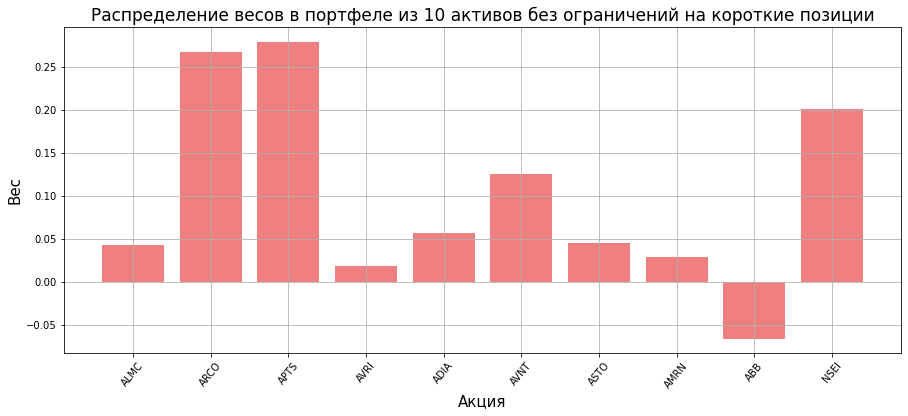

In [151]:
std_short, E_short, loss_short, weights_short = sharp_optimal_portfolio('short', risk_free_mean)

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_short

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Акция', fontsize = 15)
plt.ylabel('Вес', fontsize = 15)
plt.bar(x, height = weights_data['weight'], color="lightcoral")
plt.xticks(x, x_values, rotation='50')
plt.title("Распределение весов в портфеле из 10 активов без ограничений на короткие позиции", fontsize = 17)
plt.grid()

Следует отметить, что наибольший вес имеет активы APTS и ARCO. Та же тенденция наблюдалась при построении оптимального портфеля без ограничений на короткие позиции с помощью отношения к риску. Как и в предыдущем пункте, после APTS и ARCO лидирующие позиции занимают активы AVNT, ADIA, ASTO и ALMC. Веса остальных активов не такие существенные и по модулю меньше 0.35.

Построем теперь график, на котором отобразим эффективный фронт и оптимальные портфели, найденные с помощью отношения Шарпа и отношения к риску равному 5.

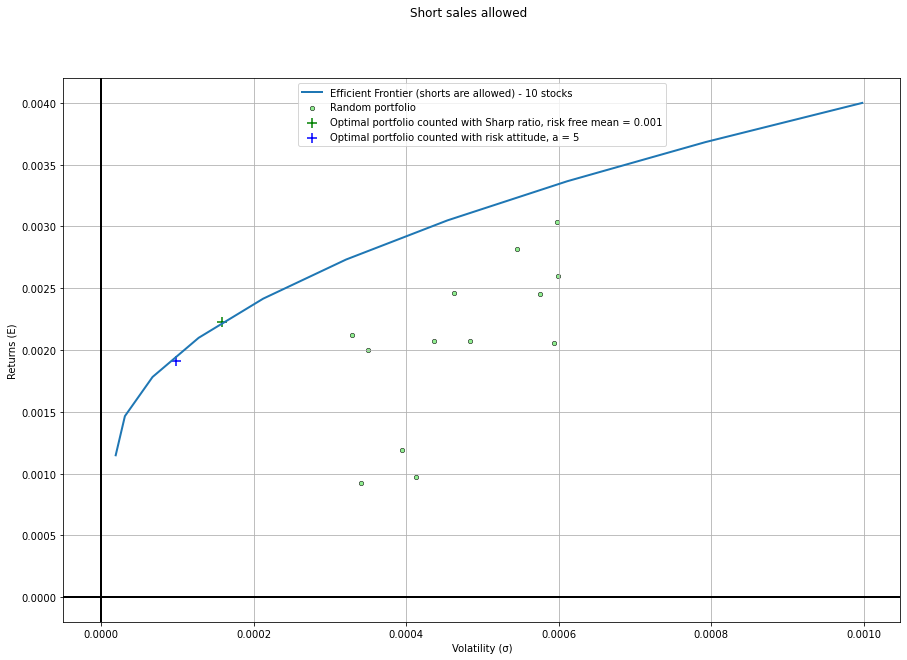

In [152]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Short sales allowed")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')
# random portfolios plot
random_portfolios_short_std_devs, random_portfolios_short_means = generate_random_portfolios(sample_means10, sample_cov10, short_sales=True, n_portfolios=1000)

indices = [ind for ind in range(len(random_portfolios_short_std_devs)) if random_portfolios_short_std_devs[ind] < 0.0006]
indices = [ind for ind in indices if random_portfolios_short_means[ind] < 0.01]
random_portfolios_short_std_devs = [random_portfolios_short_std_devs[i] for i in indices]
random_portfolios_short_means = [random_portfolios_short_means[i] for i in indices]

ax.scatter(random_portfolios_short_std_devs, random_portfolios_short_means, marker="o", color='lightgreen',
           edgecolors= 'black', linewidth=0.5, s=20, label="Random portfolio")
#Optimal frontier 
ax.plot(opt_volatilities_short10, target_returns_short10, color="C0", linewidth=2, label="Efficient Frontier (shorts are allowed) - 10 stocks")
#ax.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (shorts are not allowed)") 

# optimal portfolio counted with sharp ratio 
ax.scatter(std_short, E_short, color="g", marker="+", s=100, label="Optimal portfolio counted with Sharp ratio, risk free mean = 0.001")    
ax.scatter(std_short_1, E_short_1, color="b", marker="+", s=100, label="Optimal portfolio counted with risk attitude, a = 5")    
       
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

На графике видно, что оптимальный портфель, посчитанный с помощью отношения Шарпа при средней доходности безрискового портфеля 0.001 находится ближе к эффективному фронту, чем другой оптимальный портфель. Тем не менее данный портфель более рисковый.

#### Оценим VaR портфеля (без ограничений на короткие позиции):

In [153]:
сonfidence_levels = [0.9, 0.95, 0.99]
VaR = {}

print('VaR для портфеля из 10 активов без запрета на короткие продажи:')

for level in сonfidence_levels:
    VaR[level] = np.quantile(loss_short, level)
    print('- Потери не превысят %.5f с уверенностью %.f%s.' % (np.round(VaR[level],5), level*100, '%'))

VaR для портфеля из 10 активов без запрета на короткие продажи:
- Потери не превысят 0.00816 с уверенностью 90%.
- Потери не превысят 0.01289 с уверенностью 95%.
- Потери не превысят 0.02383 с уверенностью 99%.


Значения VaR для рассматриваемого портфеля достаточно близки к значениям портфеля из п.4.

### Короткие продажи запрещены:
Найдем оптимальный портфель, решая следующую задачу оптимизации

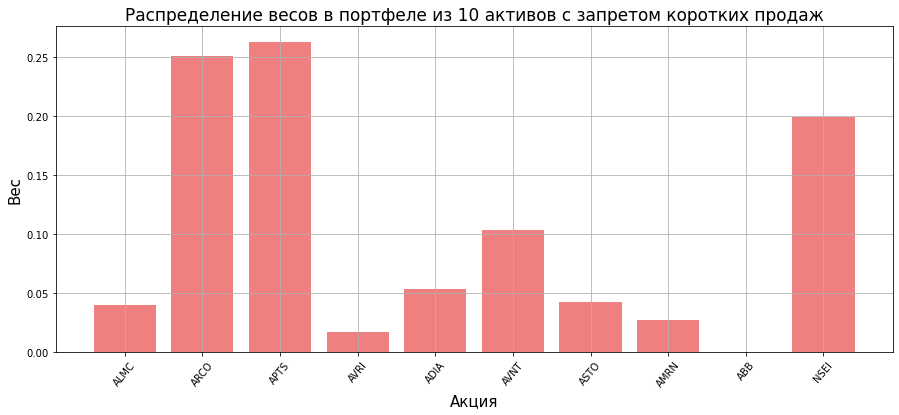

In [154]:
std_not_short, E_not_short, loss_not_short, weights_not_short = sharp_optimal_portfolio('short_sales_are_not_allowed', risk_free_mean)

weights_data = pd.DataFrame(index = tickers10, columns = ['weight'])
weights_data['weight'] = weights_not_short

plt.figure(figsize = (15,6))
x = np.arange(weights_data.shape[0])
x_values = weights_data.index
plt.xlabel('Акция', fontsize = 15)
plt.ylabel('Вес', fontsize = 15)
plt.bar(x, height = weights_data['weight'], color="lightcoral")
plt.xticks(x, x_values, rotation='50')
plt.title("Распределение весов в портфеле из 10 активов с запретом коротких продаж", fontsize = 17)
plt.grid()

На данной диаграмме видно, что веса активов APTS и ARCO являются самыми существенными. Тут так же, как и в портфеле с разрешенными короткими продажами влиятельными активами являются AVNT, ADIA, ASTO и ALMC. Веса всех остальных активов являются незначительными по сравнению с перечисленными выше.

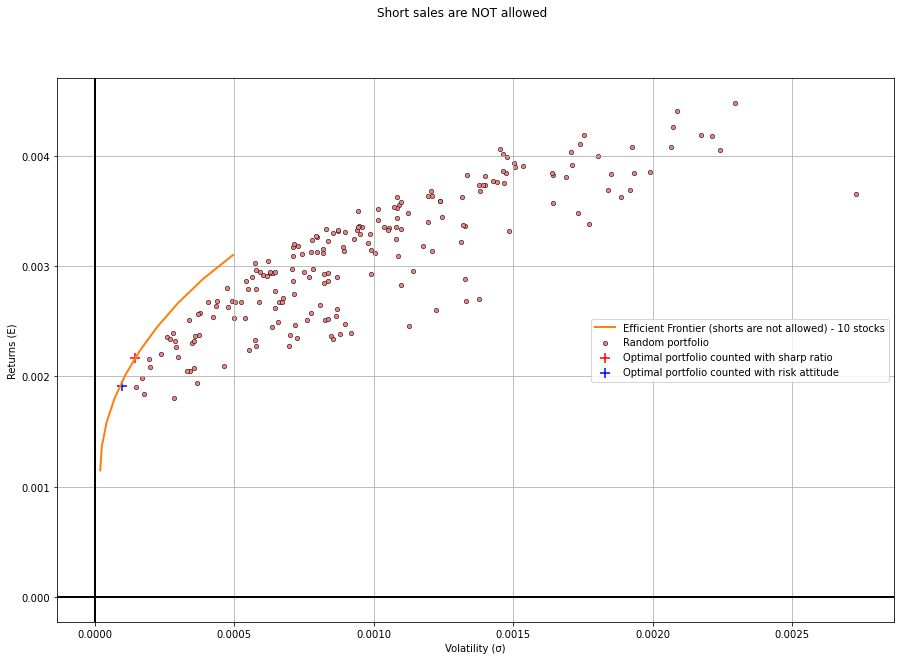

In [155]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Short sales are NOT allowed")
ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')

random_portfolios_no_short_std_devs10, random_portfolios_no_short_means10 = generate_random_portfolios(sample_means10, sample_cov10, short_sales=False, n_portfolios=200)

# random portfolios plot
ax.scatter(random_portfolios_no_short_std_devs10, random_portfolios_no_short_means10, marker="o", color='lightcoral',
           edgecolors= 'black', linewidth=0.5, s=20, label="Random portfolio")

# optimal frontier plot
target_returns_no_short = np.linspace(opt_no_short_return, 0.003, 10)
opt_volatilities_no_short = []

# min risk plot 
ax.scatter(std_not_short, E_not_short, color="r", marker="+", s=100, label="Optimal portfolio counted with sharp ratio")  
ax.scatter(std_not_short_1, E_not_short_1, color="b", marker="+", s=100, label="Optimal portfolio counted with risk attitude")  
        
ax.plot(opt_volatilities_no_short10, target_returns_no_short10, color="C1", linewidth=2, label="Efficient Frontier (shorts are not allowed) - 10 stocks") 
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()

Из графика нельзя сделать конкретный вывод, что портфель построенный с помощью коэфициента Шарпа лучше, тк доходность выше, но и риск больше. Тем не менее он лежит на эффективном фронте.

In [156]:
сonfidence_levels = [0.9, 0.95, 0.99]
VaR = {}

print('VaR для портфеля из 10 активов с запретом на короткие продажи:')

for level in сonfidence_levels:
    VaR[level] = np.quantile(loss_not_short, level)
    print('- Потери не превысят %.5f с уверенностью %.f%s.' % (np.round(VaR[level],5), level*100, '%'))

VaR для портфеля из 10 активов с запретом на короткие продажи:
- Потери не превысят 0.00795 с уверенностью 90%.
- Потери не превысят 0.01176 с уверенностью 95%.
- Потери не превысят 0.02267 с уверенностью 99%.


Потери для данного портфеля с запретом на короткие продажи больше, чем для портфеля из п.4 для любого уровня.
Теперь изобразим на графике оптимальные портфели, рассмотренные выше.

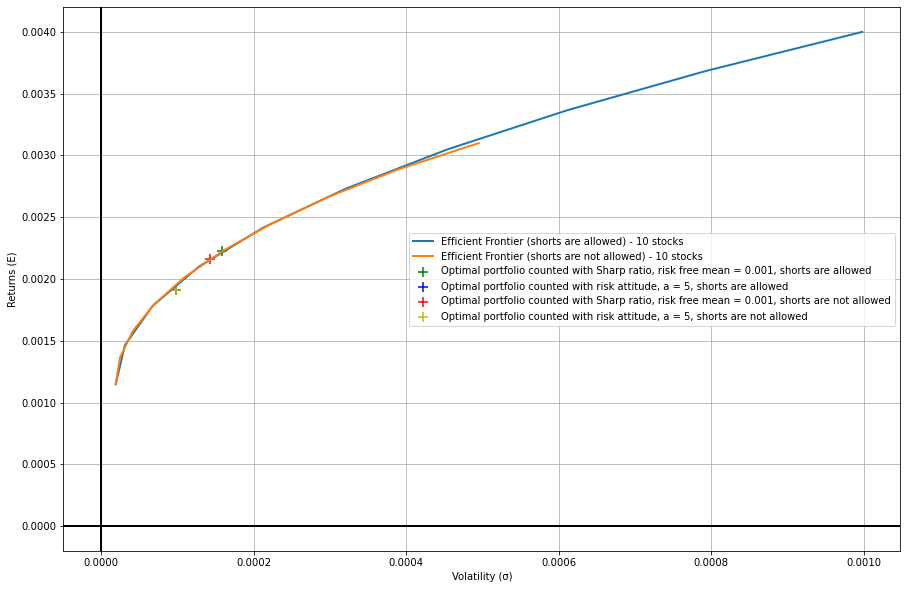

In [157]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.axhline(linewidth=2, color='black')
ax.axvline(linewidth=2, color='black')
# random portfolios plot

#Optimal frontier 
ax.plot(opt_volatilities_short10, target_returns_short10, color="C0", linewidth=2, label="Efficient Frontier (shorts are allowed) - 10 stocks")
#ax.plot(opt_volatilities_no_short, target_returns_no_short, color="lightcoral", linewidth=2, label="Efficient Frontier (shorts are not allowed)") 

# optimal portfolio counted with sharp ratio 
ax.scatter(std_short, E_short, color="g", marker="+", s=100, label="Optimal portfolio counted with Sharp ratio, risk free mean = 0.001, shorts are allowed")    
ax.scatter(std_short_1, E_short_1, color="b", marker="+", s=100, label="Optimal portfolio counted with risk attitude, a = 5, shorts are allowed")    

# optimal frontier plot
target_returns_no_short = np.linspace(opt_no_short_return, 0.003, 10)
opt_volatilities_no_short = []

# min risk plot 
ax.scatter(std_not_short, E_not_short, color="r", marker="+", s=100, label="Optimal portfolio counted with Sharp ratio, risk free mean = 0.001, shorts are not allowed")  
ax.scatter(std_not_short_1, E_not_short_1, color="y", marker="+", s=100, label="Optimal portfolio counted with risk attitude, a = 5, shorts are not allowed")  
        
ax.plot(opt_volatilities_no_short10, target_returns_no_short10, color="C1", linewidth=2, label="Efficient Frontier (shorts are not allowed) - 10 stocks") 
ax.set_xlabel("Volatility (σ)")
ax.set_ylabel("Returns (E)")
ax.grid()
ax.legend()
fig.show()
